In [1]:
from math import sqrt
from numpy import concatenate
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
df=pd.read_csv("269_Temp.csv")

In [3]:
df.head()

,Date,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
0,1/15/2020 1:44,69.3,66.71,68,1/14/2020 1:44,68.8,1/13/2020 1:44,70.4
1,1/15/2020 3:44,69.8,66.14,66,1/14/2020 3:44,69.2,1/13/2020 3:44,70.4
2,1/15/2020 5:44,70.1,65.81,68,1/14/2020 5:44,69.6,1/13/2020 5:44,70.4
3,1/15/2020 7:44,68.0,67.14,72,1/14/2020 7:44,67.6,1/13/2020 7:44,69.8
4,1/15/2020 9:44,67.6,66.77,75,1/14/2020 9:44,66.0,1/13/2020 9:44,67.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 8 columns):
Date                           384 non-null object
Temperature                    384 non-null float64
Humidity                       384 non-null float64
Outside Temperature            384 non-null int64
Previous Date                  384 non-null object
Temperature on Previous day    384 non-null float64
2 days before Date             384 non-null object
Temperature 2 days before      384 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 24.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [6]:
df.tail()

,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
Date,,,,,,,
2020-02-15 15:44:00,68.5,43.79,62,2/14/2020 15:44,65.9,2/13/2020 15:44,65.8
2020-02-15 17:44:00,68.6,45.00,62,2/14/2020 17:44,65.7,2/13/2020 17:44,65.7
2020-02-15 19:44:00,68.6,45.99,63,2/14/2020 19:44,66.5,2/13/2020 19:44,66.9
2020-02-15 21:44:00,68.7,46.77,61,2/14/2020 21:44,67.0,2/13/2020 21:44,67.4
2020-02-15 23:44:00,68.9,47.22,59,2/14/2020 23:44,67.3,2/13/2020 23:44,67.6


In [7]:
df.dropna(inplace=True)

In [8]:
ts=df.loc['1/15/2020':'2/15/2020',['Temperature','Humidity','Outside Temperature','Temperature on Previous day','Temperature 2 days before']]
#ts=pd.concat([df.loc['2/03/2020':'2/07/2020'],df.loc['2/10/2020':'2/14/2020']])[['Temperature','Humidity','Outside Temperature','Temperature on Previous day','Temperature 2 days before']]
ts=pd.DataFrame(ts)
ts.head()

,Temperature,Humidity,Outside Temperature,Temperature on Previous day,Temperature 2 days before
Date,,,,,
2020-01-15 01:44:00,69.3,66.71,68,68.8,70.4
2020-01-15 03:44:00,69.8,66.14,66,69.2,70.4
2020-01-15 05:44:00,70.1,65.81,68,69.6,70.4
2020-01-15 07:44:00,68.0,67.14,72,67.6,69.8
2020-01-15 09:44:00,67.6,66.77,75,66.0,67.9


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


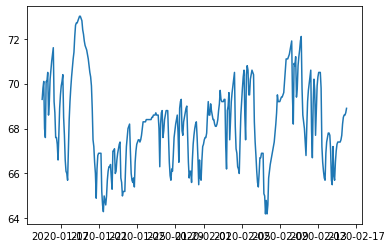

In [9]:
plt.plot(ts['Temperature'])

In [10]:
values=ts.values

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [12]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [13]:
reframed = series_to_supervised(scaled, 12, 1)

In [14]:
reframed.head()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
12,0.579545,0.925813,0.804348,0.522727,0.704545,0.636364,0.909975,0.760870,0.568182,0.704545,...,0.727273,0.863851,0.717391,0.534091,0.465909,0.772727,0.858016,0.717391,0.579545,0.522727
13,0.636364,0.909975,0.760870,0.568182,0.704545,0.670455,0.900806,0.804348,0.613636,0.704545,...,0.772727,0.858016,0.717391,0.579545,0.522727,0.806818,0.856349,0.760870,0.636364,0.568182
14,0.670455,0.900806,0.804348,0.613636,0.704545,0.431818,0.937760,0.891304,0.386364,0.636364,...,0.806818,0.856349,0.760870,0.636364,0.568182,0.840909,0.863295,0.760870,0.670455,0.613636
15,0.431818,0.937760,0.891304,0.386364,0.636364,0.386364,0.927480,0.956522,0.204545,0.420455,...,0.840909,0.863295,0.760870,0.670455,0.613636,0.568182,0.882467,0.847826,0.431818,0.386364
16,0.386364,0.927480,0.956522,0.204545,0.420455,0.670455,0.892748,0.956522,0.215909,0.340909,...,0.568182,0.882467,0.847826,0.431818,0.386364,0.511364,0.881912,0.913043,0.386364,0.204545


In [15]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[61,62,63,64]], axis=1, inplace=True)

In [16]:
reframed.tail()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t)
379,0.193182,0.477911,0.456522,0.181818,0.625000,0.170455,0.492637,0.347826,0.170455,0.397727,...,0.207836,0.717391,0.147727,0.261364,0.454545,0.247013,0.760870,0.340909,0.215909,0.488636
380,0.170455,0.492637,0.347826,0.170455,0.397727,0.261364,0.459850,0.239130,0.306818,0.522727,...,0.247013,0.760870,0.340909,0.215909,0.488636,0.288969,0.673913,0.193182,0.181818,0.500000
381,0.261364,0.459850,0.239130,0.306818,0.522727,0.318182,0.416782,0.173913,0.363636,0.647727,...,0.288969,0.673913,0.193182,0.181818,0.500000,0.322590,0.673913,0.170455,0.170455,0.500000
382,0.318182,0.416782,0.173913,0.363636,0.647727,0.352273,0.383162,0.195652,0.386364,0.693182,...,0.322590,0.673913,0.170455,0.170455,0.500000,0.350097,0.695652,0.261364,0.306818,0.511364
383,0.352273,0.383162,0.195652,0.386364,0.693182,0.363636,0.353987,0.260870,0.409091,0.715909,...,0.350097,0.695652,0.261364,0.306818,0.511364,0.371770,0.652174,0.318182,0.363636,0.534091


In [17]:
# split into train and test sets
values = reframed.values
n_train = 276
train = values[:n_train, :]
test = values[n_train:, :]

In [18]:
test.shape

(96, 61)

In [19]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

(276, 60) (96, 60) (276,) (96,)


In [20]:
# specify the number of lag hours
n_hours = 12
n_features = 5

In [21]:
# split into input and outputs
#n_obs = n_hours * n_features
#train_X, train_y = train[:, :n_obs], train[:, -n_features]
#test_X, test_y = test[:, :n_obs], test[:, -n_features]
#print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

In [22]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

In [23]:
print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

(276, 12, 5) (96, 12, 5) (276,) (96,)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 276 samples, validate on 96 samples
Epoch 1/30
 - 1s - loss: 0.2023 - val_loss: 0.1741
Epoch 2/30
 - 0s - loss: 0.1554 - val_loss: 0.1407
Epoch 3/30
 - 0s - loss: 0.1453 - val_loss: 0.1434
Epoch 4/30
 - 0s - loss: 0.1360 - val_loss: 0.1196
Epoch 5/30
 - 0s - loss: 0.1235 - val_loss: 0.1098
Epoch 6/30
 - 0s - loss: 0.1163 - val_loss: 0.1031
Epoch 7/30
 - 0s - loss: 0.1101 - val_loss: 0.0983
Epoch 8/30
 - 0s - loss: 0.1050 - val_loss: 0.0979
Epoch 9/30
 - 0s - loss: 0.1027 - val_loss: 0.0940
Epoch 10/30
 - 0s - loss: 0.0987 - val_loss: 0.0939
Epoch 11/30
 - 0s - loss: 0.0986 - val_loss: 0.0913
Epoch 12/30
 - 0s - loss: 0.0948 - val_loss: 0.0940
Epoch 13/30
 - 0s - loss: 0.0970 - val_loss: 0.0907
Epoch 14/30
 - 0s - loss: 0.0913 - val_loss: 0.0918
Epoch 15/30
 - 0s - loss: 0.0917 - val_loss: 0.0911
Epoch 16/30
 - 0s - loss: 0.0911 - val_loss: 0.0913
Epoch 17/30


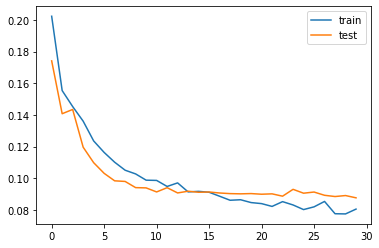

In [24]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=30, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [25]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]*test_X.shape[2]))

In [26]:
test_X.shape

(96, 60)

In [27]:
# invert scaling for forecast
testy_forecast = np.zeros(shape=(len(test_y), 5))

testy_forecast[:,0] = yhat[:,0]

inv_yhat = scaler.inverse_transform(testy_forecast)[:,0]

In [28]:
# invert scaling for actual test
testy_actual = np.zeros(shape=(len(test_y), 5))

testy_actual[:,0] = test_y

inv_y = scaler.inverse_transform(testy_actual)[:,0]

In [29]:
# invert scaling for actual train
trainy_actual = np.zeros(shape=(len(train_y), 5))

trainy_actual[:,0] = train_y

inv_y_train = scaler.inverse_transform(trainy_actual)[:,0]

In [30]:
inv_yhat

array([66.95449383, 67.25873377, 67.45267668, 67.59828498, 67.59833324,
       67.82337682, 68.04725833, 68.48694425, 68.92181926, 69.48442559,
       69.89305253, 70.04512005, 69.99999552, 69.84993796, 69.65413589,
       69.45329266, 69.36890354, 69.46779513, 69.81481133, 70.33190131,
       70.89183888, 71.3783556 , 71.55311861, 71.51778269, 71.39503379,
       71.29041705, 71.23812652, 71.23472447, 70.60337653, 69.86748214,
       70.20358305, 70.47575798, 70.89250503, 70.64584646, 70.52173276,
       70.69261432, 70.91970301, 71.21123013, 71.55169191, 71.83789306,
       71.01585135, 70.10203214, 69.95694809, 69.65313563, 69.33258519,
       68.63202829, 68.61467977, 68.99526582, 69.35948892, 69.66473594,
       69.9451663 , 70.20902233, 69.36826887, 68.58621874, 68.91799655,
       69.47720609, 69.78431463, 69.48312111, 69.89038272, 70.48781357,
       70.86419559, 71.00784664, 70.93830724, 70.72556577, 69.95925546,
       68.76892877, 68.2196492 , 67.88715043, 67.50283399, 67.03

In [31]:
inv_y

array([66.6, 66.8, 67. , 67.2, 67.4, 67.8, 68.2, 68.7, 69.5, 69.2, 69.2,
       69.2, 69.3, 69.4, 69.4, 69.5, 69.6, 70.1, 70.6, 71.1, 71.1, 71.1,
       71.2, 71.3, 71.5, 71.7, 71.9, 69.4, 68.2, 70.9, 70.8, 71.2, 69.4,
       69.8, 70.8, 71.2, 71.5, 71.9, 72.1, 69.8, 68.6, 68.3, 68. , 67.4,
       66.8, 68.1, 69.2, 69.7, 70. , 70.3, 70.6, 67.9, 66.7, 69.1, 70.2,
       69.7, 67.7, 68.8, 69.9, 70.3, 70.5, 70.5, 70.5, 69.8, 67.2, 66.5,
       66.1, 65.8, 65.7, 66.9, 67.4, 67.6, 67.8, 67.8, 67.7, 67. , 65.7,
       65.5, 67.2, 65.9, 65.7, 66.5, 67. , 67.3, 67.4, 67.4, 67.4, 67.4,
       67.5, 67.7, 68.2, 68.5, 68.6, 68.6, 68.7, 68.9])

In [32]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.048


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Temperature (F)')

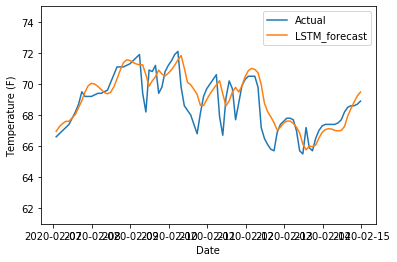

In [34]:
plt.plot(ts.index[276:372],inv_y,label='Actual')
plt.plot(ts.index[276:372],inv_yhat,label='LSTM_forecast')
plt.legend(loc="upper right")
plt.ylim(61,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

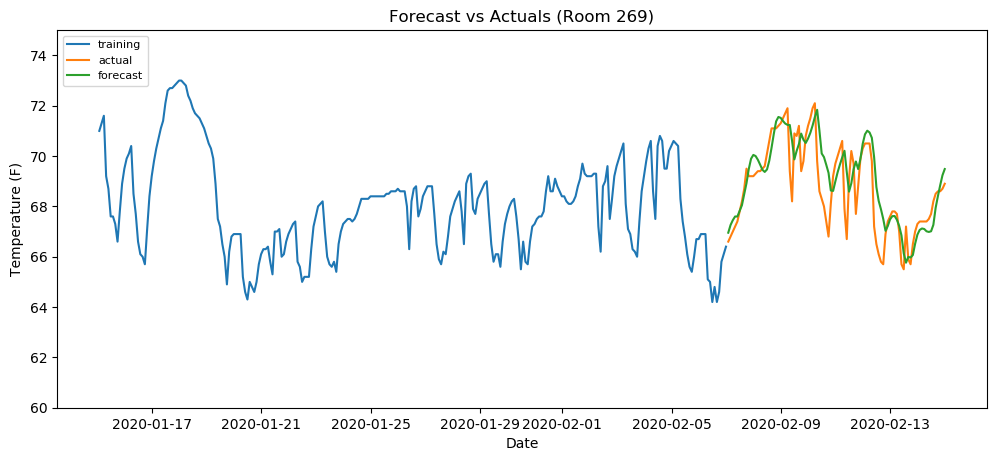

In [35]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ts.index[:276],inv_y_train, label='training')
plt.plot(ts.index[276:372],inv_y, label='actual')
plt.plot(ts.index[276:372],inv_yhat, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals (Room 269)')
plt.legend(loc='upper left', fontsize=8)
plt.ylim(60,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()

# Linear regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regressor = LinearRegression()

In [38]:
train_X_lr, train_y_lr = train[:, :-1], train[:, -1]
test_X_lr, test_y_lr = test[:, :-1], test[:, -1]

In [39]:
regressor.fit(train_X_lr,train_y_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred= regressor.predict(test_X_lr)

In [41]:
#Invert scaling for forecast
testy_forecast_lr = np.zeros(shape=(len(test_y_lr), 5))

testy_forecast_lr[:,0] = y_pred

inv_yhat_lr = scaler.inverse_transform(testy_forecast_lr)[:,0]

In [42]:
inv_yhat_lr.shape

(96,)

In [43]:
#Invert scaling for actual
# invert scaling for actual

testy_actual_lr = np.zeros(shape=(len(test_y_lr), 5))

testy_actual_lr[:,0] = test_y_lr

inv_y_lr = scaler.inverse_transform(testy_actual_lr)[:,0]

In [44]:
inv_y_lr

array([66.6, 66.8, 67. , 67.2, 67.4, 67.8, 68.2, 68.7, 69.5, 69.2, 69.2,
       69.2, 69.3, 69.4, 69.4, 69.5, 69.6, 70.1, 70.6, 71.1, 71.1, 71.1,
       71.2, 71.3, 71.5, 71.7, 71.9, 69.4, 68.2, 70.9, 70.8, 71.2, 69.4,
       69.8, 70.8, 71.2, 71.5, 71.9, 72.1, 69.8, 68.6, 68.3, 68. , 67.4,
       66.8, 68.1, 69.2, 69.7, 70. , 70.3, 70.6, 67.9, 66.7, 69.1, 70.2,
       69.7, 67.7, 68.8, 69.9, 70.3, 70.5, 70.5, 70.5, 69.8, 67.2, 66.5,
       66.1, 65.8, 65.7, 66.9, 67.4, 67.6, 67.8, 67.8, 67.7, 67. , 65.7,
       65.5, 67.2, 65.9, 65.7, 66.5, 67. , 67.3, 67.4, 67.4, 67.4, 67.4,
       67.5, 67.7, 68.2, 68.5, 68.6, 68.6, 68.7, 68.9])

Text(0, 0.5, 'Temperature (F)')

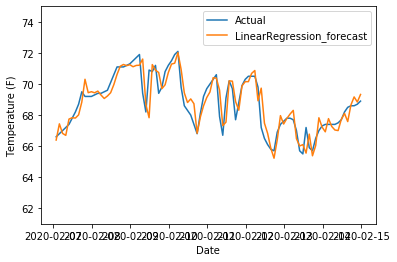

In [45]:
plt.plot(ts.index[276:372],inv_y_lr,label='Actual')
plt.plot(ts.index[276:372],inv_yhat_lr,label='LinearRegression_forecast')
plt.legend(loc="upper right")
plt.ylim(61,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

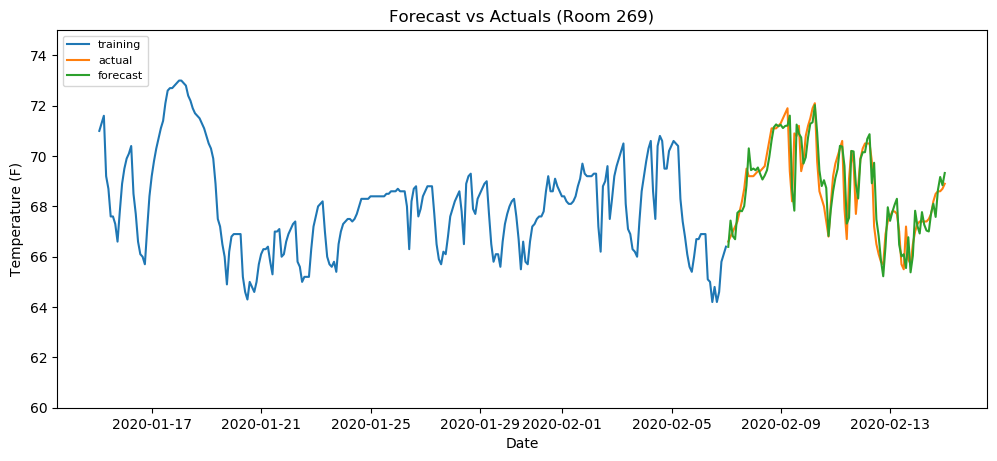

In [46]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ts.index[:276],inv_y_train, label='training')
plt.plot(ts.index[276:372],inv_y_lr, label='actual')
plt.plot(ts.index[276:372],inv_yhat_lr, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals (Room 269)')
plt.legend(loc='upper left', fontsize=8)
plt.ylim(60,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()

In [47]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_lr, inv_yhat_lr))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.756
